# 20 MEV Pair Check

In [1]:
%matplotlib inline
import os
import math
import h5py

import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [2]:
fdata_dict_s20 ={
    'cosima'    : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_nosmear/20MeVBeam-100000Trig.inc1.id1.sim',
    'ns_l2'     : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_nosmear/TKR_20MeVBeam-100000Trig.inc1.id1_sim.L2.h5',
    'ns_l3'     : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_nosmear/TKR_20MeVBeam-100000Trig.inc1.id1_sim.L3.h5', 
    'sim_h5'    : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_nosmear/20MeVBeam-100000Trig.inc1.id1.sim.h5',
    'ns_l1'     : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_nosmear/TKR_20MeVBeam-100000Trig.inc1.id1_sim.L1.h5',
    'ns_desh'   : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_nosmear/TKR_20MeVBeam-100000Trig.inc1.id1_sim.h5',
}

In [3]:
fdata_dict_s20_5per ={
    'cosima'    : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_smear_5per/20MeVBeam-100000Trig.inc1.id1.sim',
    'ns_l2'     : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_smear_5per/TKR_20MeVBeam-100000Trig.inc1.id1_sim.L2.h5',
    'ns_l3'     : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_smear_5per/TKR_20MeVBeam-100000Trig.inc1.id1_sim.L3.h5', 
    'sim_h5'    : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_smear_5per/20MeVBeam-100000Trig.inc1.id1.sim.h5',
    'ns_l1'     : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_smear_5per/TKR_20MeVBeam-100000Trig.inc1.id1_sim.L1.h5',
    'ns_desh'   : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_smear_5per/TKR_20MeVBeam-100000Trig.inc1.id1_sim.h5',
}

In [4]:
fdata_dict_s10 ={
    'cosima'    : '/Users/swasti/code/test_temp/multi_hit/sim_10meV_nosmear/10MeVBeam-100000Trig.inc1.id1.sim',
    'ns_l2'     : '/Users/swasti/code/test_temp/multi_hit/sim_10meV_nosmear/TKR_10MeVBeam-100000Trig.inc1.id1_sim.L2.h5',
    'ns_l3'     : '/Users/swasti/code/test_temp/multi_hit/sim_10meV_nosmear/TKR_10MeVBeam-100000Trig.inc1.id1_sim.L3.h5', 
    'sim_h5'    : '/Users/swasti/code/test_temp/multi_hit/sim_10meV_nosmear/10MeVBeam-100000Trig.inc1.id1.sim.h5',
    'ns_l1'     : '/Users/swasti/code/test_temp/multi_hit/sim_10meV_nosmear/TKR_10MeVBeam-100000Trig.inc1.id1_sim.L1.h5',
    'ns_desh'   : '/Users/swasti/code/test_temp/multi_hit/sim_10meV_nosmear/TKR_10MeVBeam-100000Trig.inc1.id1_sim.h5',
}

In [179]:
#run = 's20_5per'
run = 's10'

if run == 's10':
    fdata_dict = fdata_dict_s10
elif run == 's20':
    fdata_dict = fdata_dict_s20
elif run == 's20_5per':
    fdata_dict = fdata_dict_s20_5per

In [180]:
with open(fdata_dict['cosima']) as f:
    contents = f.readlines()
    

In [181]:
trk_hit_main =[]
for i in range(len(contents)):
# for i in range(400):
    line = contents[i]

    if not line.isspace():
        if (line.find('SE') >= 0):
            
            line = contents[i+1]
            curid = line.split()[1] #next line to SE is is the ID.
            
#             print(curid)

            pair_flag = False
            trk_flag = False
            
            trk_hit = []
            
            i+=1
            line = contents[i]
            while (line.find('SE') < 0):          
                
                if (line.find('IA') >= 0) and  (line.find('PAIR') >= 0):  # no. of hits
                    pair_flag = True

                if (line.find('HTsim') >= 0):  # no. of hits
                    delme = line.split()
                    if delme[1] == '1;':
                        delme1 = line.split(";")
                        trk_hit = [float(curid),float(delme1[1]),float(delme1[2]),float(delme1[3]),float(delme1[4])]
                        trk_flag = True
                        
                        if pair_flag:
                            trk_hit_main.append(trk_hit)
                
                
                    
                i+=1
                if i<len(contents):
                    line = contents[i]
                else:
                    break
            

In [182]:
#X = data[:, [1, 9]]

In [183]:
trk_hit_main = np.array(trk_hit_main)
trk_evtid = trk_hit_main[:,0] # Tracks only pair

In [184]:
print(len(np.unique(trk_evtid)))
pair_evtid= np.unique(trk_evtid)

15595


In [185]:
trk_hit_main[np.where(trk_hit_main[:,0]==499)]

array([], shape=(0, 5), dtype=float64)

# Sim h5

In [186]:
fname = fdata_dict['sim_h5']
h5_sim = h5py.File(fname,'r')

In [187]:
h5_nrg = h5_sim['Events/TKR/Energy']

In [188]:
h5_sim['Events/TKR/event_id'][0:5]

array([1, 2, 3, 4, 5])

In [189]:
nevt = h5_nrg.shape[0]
cnt_array=np.zeros((10,6,6), dtype=int)

for i in range(nevt):
    t_nrg = h5_nrg[i]
    
    for j in range(10):
        temp_nrg = t_nrg[j]
        
        a_cnt = np.count_nonzero(temp_nrg[0,:]>0.0)  # side a count
        b_cnt = np.count_nonzero(temp_nrg[1,:]>0.0)  # side b count
        
        if a_cnt>4 or b_cnt>4:
            cnt_array[j,5,5]+= 1
        else:
            cnt_array[j,a_cnt,b_cnt]+= 1

In [190]:
simh5_tothitarr = np.sum(cnt_array, axis=0)
simh5_tothitarr

array([[943028,      0,      0,      0,      0,      0],
       [     0,  21947,   7056,    389,     68,      0],
       [     0,   6992,   6333,   1928,    502,      0],
       [     0,    343,   1922,   1958,    878,      0],
       [     0,     73,    475,    929,    790,      0],
       [     0,      0,      0,      0,      0,   4389]])

# Sim L2

In [191]:
fname = fdata_dict['ns_l2']
l2_ns = h5py.File(fname,'r')
layer_list = ['layer00','layer01','layer02','layer03','layer04','layer05','layer06','layer07','layer08','layer09']

In [192]:
l2_ns['layer00/data/sync_index']

<HDF5 dataset "sync_index": shape (100001,), type "<i8">

In [193]:
evt = l2_ns['layer00/vdata/nrg'].shape[0]
l2_ns_nrg = np.zeros(shape=(evt,10,2,192))

In [194]:
for l in range(10):
    if layer_list[l] in l2_ns.keys():
        l2_ns_nrg[:,l,:,:] = l2_ns[f'{layer_list[l]}/vdata/nrg'][...]
# l2_ns_nrg

In [195]:
nevt1 = l2_ns_nrg.shape[0]
cnt_array1 =np.zeros((10,6,6), dtype=int)

for i in range(nevt):
    t_nrg = l2_ns_nrg[i]
    
    for j in range(10):
        temp_nrg =t_nrg[j]
        
        a_cnt = np.count_nonzero(temp_nrg[0,:]>0.0)  # side a count
        b_cnt = np.count_nonzero(temp_nrg[1,:]>0.0)  # side b count
        
        if a_cnt>4 or b_cnt>4:
            cnt_array1[j,5,5]+= 1
        else:
            cnt_array1[j,a_cnt,b_cnt]+= 1

In [196]:
l2_tothitarr = np.sum(cnt_array1, axis=0)
l2_tothitarr

array([[943114,      0,      0,      0,      0,      0],
       [     0,  25020,   6376,    286,     52,      0],
       [     0,   6161,   5851,   1850,    449,      0],
       [     0,    263,   1859,   1884,    848,      0],
       [     0,     66,    426,    863,    756,      0],
       [     0,      0,      0,      0,      0,   3876]])

In [197]:
l2_ns_nrg.shape

(100001, 10, 2, 192)

In [198]:
l2_ns_nrg_arr = l2_ns_nrg[l2_ns_nrg>0.0]
l2_ns_nrg_arr

array([365.55137, 365.55137, 156.65245, ...,  99.56211, 148.65841,
       148.65841])

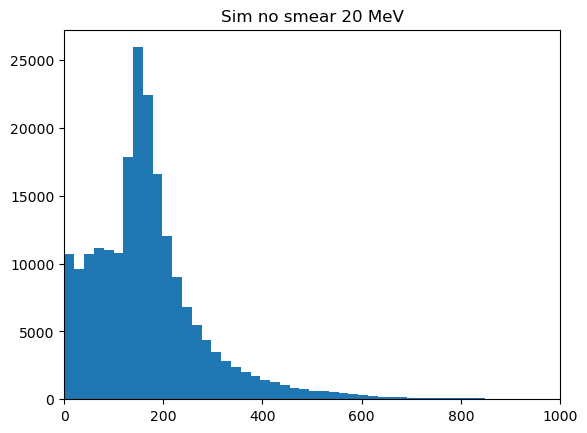

In [199]:
plt.hist(l2_ns_nrg_arr, bins=100)
plt.xlim(0,1000)
plt.title('Sim no smear 20 MeV')
plt.savefig("Nrg_Hist_s20")


## compare (transition of types from sim2h5 --> L2)

In [200]:
tot_test_arr = np.subtract(l2_tothitarr,simh5_tothitarr)
tot_test_arr

array([[  86,    0,    0,    0,    0,    0],
       [   0, 3073, -680, -103,  -16,    0],
       [   0, -831, -482,  -78,  -53,    0],
       [   0,  -80,  -63,  -74,  -30,    0],
       [   0,   -7,  -49,  -66,  -34,    0],
       [   0,    0,    0,    0,    0, -513]])

In [201]:
np.sum(tot_test_arr)

0

# Sim L3

In [202]:
fname = fdata_dict['ns_l3']
l3_ns = h5py.File(fname,'r')

In [203]:
l3_ns['tracker'].keys()

<KeysViewHDF5 ['energy', 'event_id', 'event_time', 'pulse_height']>

In [204]:
l3_ns['tracker/energy'][0:10]

array([[  1.      ,   0.2805  ,   0.1785  ,   0.025   , 365.55137 ,
          1.      ],
       [  3.      ,   0.6885  ,  -0.5865  ,  13.325   , 156.65245 ,
          1.      ],
       [  3.      ,   3.1875  ,   0.9435  ,   3.825   , 134.22256 ,
          1.      ],
       [  5.      ,  -0.3825  ,  -0.4335  ,   7.625   , 139.92301 ,
          1.      ],
       [  7.      ,  -0.6375  ,   0.6885  ,   1.925   , 119.28041 ,
          1.      ],
       [  8.      ,  -0.8925  ,   0.9435  ,   3.825   , 141.70863 ,
          3.      ],
       [  8.      ,  -1.6575  ,   0.1275  ,   3.825   , 215.492435,
          3.      ],
       [  8.      ,  -0.8925  ,   0.1275  ,   3.825   , 141.70863 ,
          2.      ],
       [  8.      ,  -1.6575  ,   0.9435  ,   3.825   , 215.492435,
          2.      ],
       [ 11.      ,  -4.437   ,  -4.6665  ,   1.925   , 116.13146 ,
          1.      ]])

In [205]:
l3_ns['tracker/energy'][475:495]

array([[737.      ,   1.3515  ,   3.7995  ,  11.425   ,  81.18657 ,
          2.      ],
       [737.      ,   0.4335  ,   3.7995  ,  11.425   , 138.91603 ,
          3.      ],
       [737.      ,   1.3515  ,  -0.1275  ,  11.425   ,  81.18657 ,
          3.      ],
       [737.      ,   0.4335  ,  -0.1275  ,  11.425   , 138.91603 ,
          2.      ],
       [744.      ,  -0.663   ,   0.7395  ,   7.625   , 201.67755 ,
          1.      ],
       [744.      ,  -1.5555  ,   1.3515  ,   5.725   , 320.965725,
          1.      ],
       [748.      ,  -0.1785  ,   0.306   ,  11.425   , 266.46556 ,
          1.      ],
       [748.      ,   0.7395  ,  -0.0765  ,  13.325   , 127.58797 ,
          1.      ],
       [749.      ,  -2.7285  ,  -4.7175  ,   1.925   ,  12.86672 ,
          1.      ],
       [749.      ,  -0.5865  ,   0.4845  ,   9.525   , 221.22486 ,
          1.      ],
       [750.      ,   0.2295  ,   1.53    ,  13.325   , 291.68804 ,
          1.      ],
       [750.      ,  

In [206]:
l3_ns_nrg = l3_ns['tracker/energy'][...]

# Check Pair at different levels.

In [207]:
pair_evt = pair_evtid[0]

## Check at sim

In [208]:
trk_hit_main[np.where(trk_hit_main[:,0] == pair_evt)]

array([[  1.     ,   0.2805 ,   0.1785 ,   0.025  , 365.55137]])

## check at simh5

In [209]:
# Note that some of these, converts to 2x1y, etc gets added.
t_nrg = h5_nrg[32,:,:,:]
t_nrg[np.where(t_nrg[:,:,:]>0)]

array([177.53513, 185.2097 ,  67.40181, 210.53403, 164.70662, 104.875  ,
       131.88995,  57.55039, 305.19444, 277.93584, 111.50132,  53.2053 ,
       236.76495])

In [210]:

np.where(t_nrg[:,:,:]>0)

(array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]),
 array([114, 115, 116, 117, 135, 149, 150,  84,  85,  86,  87,  88, 100]))

In [211]:
t_nrg.shape

(10, 2, 192)

## check at L2

In [212]:
t_nrg = l2_ns_nrg[3183,:,:,:]
t_nrg[np.where(t_nrg[:,:,:]>0)]

array([181.73435, 181.73435, 172.50263, 107.6739 ,  33.52767, 138.13272,
       307.36285, 280.17653, 171.66039, 307.83231])

In [213]:
np.where(t_nrg[:,:,:]>0)

(array([4, 4, 5, 5, 5, 5, 5, 5, 5, 5]),
 array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1]),
 array([ 83, 104,  64,  65,  81,  82,  83,  76,  78,  92]))

In [214]:
np.where(t_nrg[:,:,:]>0)

(array([4, 4, 5, 5, 5, 5, 5, 5, 5, 5]),
 array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1]),
 array([ 83, 104,  64,  65,  81,  82,  83,  76,  78,  92]))

## Check at L3

## Various Checks

### check at L2

In [215]:
t_nrg[6,:,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

### Check L1

In [216]:
fname = fdata_dict['ns_l1']
l1_ns = h5py.File(fname,'r')

In [217]:
l1_ns.keys()

<KeysViewHDF5 ['DEE Version', 'Header', 'layer00', 'layer01', 'layer02', 'layer03', 'layer04', 'layer05', 'layer06', 'layer07', 'layer08', 'layer09']>

In [218]:
np.array(l1_ns['layer09/vdata/channel_cm_sub'][4])
np.where( np.array(l1_ns['layer09/vdata/channel_cm_sub'][4]) > 0)

(array([], dtype=int64), array([], dtype=int64))

### RevCal desh file

In [219]:
fname = fdata_dict['ns_desh']
desh_ns = h5py.File(fname,'r')

In [220]:
np.array(desh_ns['TKR/Energy'][3,9,:,:])
np.where(np.array(desh_ns['TKR/Energy'][3,9,:,:]) >0)

(array([], dtype=int64), array([], dtype=int64))

# Statistics

## Check the 2hit L3s

In [221]:
l3_ns_nrg[:,5] > 1

array([False, False, False, ...,  True, False, False])

In [222]:
def_pair = l3_ns_nrg[l3_ns_nrg[:,5]>1]

In [223]:
dp_id = def_pair[:,0]
len(dp_id)

13100

In [224]:
uq_dp_id= np.unique(dp_id)
uq_dp_id.shape

(3223,)

> No. of events with 2x2 combinations 13763

In [225]:
trk_hit_main,trk_evtid

(array([[    1.     ,     0.2805 ,     0.1785 ,     0.025  ,   365.55137],
        [    3.     ,     0.6885 ,    -0.5865 ,    13.325  ,   156.65245],
        [    3.     ,     3.1875 ,     0.9435 ,     3.825  ,   134.22256],
        ...,
        [99974.     ,     0.2805 ,    -0.4845 ,     5.725  ,    65.10477],
        [99974.     ,     0.2295 ,    -0.4845 ,     5.725  ,   106.27957],
        [99985.     ,     0.4335 ,    -0.0255 ,     9.525  ,   176.27018]]),
 array([    1.,     3.,     3., ..., 99974., 99974., 99985.]))

## for each of the unique ID, check if that hit is correct in sim.

> Steps
* get hits for the event id from L3
* get the same hit info from sim
* compare the L3 hit with qflag 2 with sim hit.

In [226]:
NLAYERS = 10
#---- Position Constansts ----
TKR_STRIP_PITCH     = 0.051                             # [cm] 510 microns
TKR_WIDTH           = 192 * TKR_STRIP_PITCH             # [cm] 192 strips of constant pitch
TKR_EDGE            = TKR_WIDTH/2.0                     # DSSD is centered at 0, thus the edges are equivalent to half of the width
TKR_STRIP_CENTROID  = TKR_EDGE - (TKR_STRIP_PITCH)/2.0  # Gives the center of strip 191

TRK_LAYER_THICKNESS = 0.05 

TKR_LAYER_SPACING   = 1.9      
# [cm] z spacing between layers
TKR_TOP_LAYER       = (TRK_LAYER_THICKNESS/2.0) + (NLAYERS - 1) * TKR_LAYER_SPACING # [cm] Global z position of layer 0 of the TKR 


def TKR_pinpoint(xpos, ypos, zpos):

    xstrip = round((float(xpos)+TKR_STRIP_CENTROID)/TKR_STRIP_PITCH)
    ystrip = round(-(float(ypos)-TKR_STRIP_CENTROID)/TKR_STRIP_PITCH)
    zlayer = round(abs((float(zpos)-TKR_TOP_LAYER)/TKR_LAYER_SPACING))
    # print('X-strip # ' + str(xstrip) + '; Y-strip # ' + str(ystrip) + '; Z-layer # ' + str(zlayer))
    return xstrip, ystrip, zlayer

In [227]:
def check_hits(sim_array,hit_array):
    n_sim = sim_array.shape[0]
    n_l3 = hit_array.shape[0]
    
    ret_list = []
    for i in range(n_l3):
        tr_flg = False
        
        for j in range(n_sim):
#             print(sim_array[j,1], hit_array[i,1])
            if (sim_array[j,1] == hit_array[i,1])\
                 and sim_array[j,2] == hit_array[i,2] and \
                 sim_array[j,3] == hit_array[i,3]: #and abs(sim_array[j,4]-hit_array[i,4])<2.0:
                
                 tr_flg = True
        
        if tr_flg == False:
#             print(check_nbr(sim_array,hit_array[i]),'***')
            tr_flg = check_nbr(sim_array,hit_array[i])
        
        ret_list.append(tr_flg)
    return ret_list

In [228]:
# here
def check_nbr(sim_array, hit_array):
    global check_flag
    
    t_sim_array = sim_array[np.where(sim_array[:,3]==hit_array[3])] # zselection.
    n_sim = t_sim_array.shape[0] # no. of sim
    all_nrg = t_sim_array[:,4]
    all_x = np.round(t_sim_array[:,1],5)
    all_y = t_sim_array[:,2]
    
    hit_flag = False
    
    #Check for X neighbor
    com_x = np.zeros((len(all_x),len(all_x)),dtype=bool)
    com_y = np.zeros((len(all_y),len(all_y)),dtype=bool)
    
    x_gen = np.zeros((len(all_x),4),dtype=float)
    y_gen = np.zeros((len(all_y),4),dtype=float)
    for i in range(len(all_x)):
        tflag_arr=[]
        for j in range(len(all_x)):
            tflag= False
            if abs(all_x[i]==all_x[j]):
                tflag = True
            tflag_arr.append(tflag)
        
        #have array of neighbors or not. 
        
        n_neighbors = np.count_nonzero(np.array(tflag_arr)==True)
        new_y = np.round(np.sum(all_y[tflag_arr])/n_neighbors,5)
        new_x = all_x[tflag_arr][0]
        new_z = hit_array[3]
        new_nrg = np.sum(all_nrg[tflag_arr])
        
        com_x[i] = np.array(tflag_arr)
        x_gen[i] = np.array([new_x,new_y,new_z,new_nrg])
        print(new_x,new_y,new_z,new_nrg,'<<<') if check_flag else None
        print(tflag_arr,'<<<') if check_flag else None
        
        
        
        #check for hit flag.
        if (new_x == hit_array[1])\
             and new_y == hit_array[2] and \
                     new_z == hit_array[3]: #and abs(new_nrg-hit_array[4])<2:
                            hit_flag =True
    
    if hit_flag == True:
        return True
    #Check for Y neighbor
    for i in range(len(all_y)):
        tflag_arr=[]
        for j in range(len(all_y)):
            tflag= False
            if abs(all_y[i]==all_y[j]):
                tflag = True
            tflag_arr.append(tflag)
        
        #have array of neighbors or not. 
            
        n_neighbors = np.count_nonzero(np.array(tflag_arr)==True)
        new_x = np.round(np.sum(all_x[tflag_arr])/n_neighbors,5)
        new_y = all_y[tflag_arr][0]
        new_z = hit_array[3]
        new_nrg = np.sum(all_nrg[tflag_arr])
                
        com_y[i] = np.array(tflag_arr)
        y_gen[i] = np.array([new_x,new_y,new_z,new_nrg])
        #check for hit flag.
        if (new_x == hit_array[1])\
             and new_y == hit_array[2] and \
                     new_z == hit_array[3] : #and abs(new_nrg-hit_array[4])<2:
                            hit_flag =True
        print(new_x,new_y,new_z,new_nrg,'>>>>') if check_flag else None
        print(tflag_arr,'>>>>>') if check_flag else None
        if hit_flag == True:
            return True
        

    
    for i in range(com_y.shape[0]):
        if y_gen[i,0]== hit_array[1]:
            if x_gen[i,1] == hit_array[2]:
                t_nrg = x_gen[i,3]+y_gen[i,3]-all_nrg[i]
                if abs(t_nrg-hit_array[4])<2:
                    hit_flag = True
                print( i, y_gen[i,0], x_gen[i,1],t_nrg) if check_flag else None
                
    return hit_flag
    

In [229]:
check_flag = False
check_i = 0

In [230]:
# for i in range(len(uq_dp_id)):

cnt_tt = 0
cnt_bb = 0
cnt_ff = 0
cnt_tf = 0
cnt_wp = 0
cnt_tff = 0
# for i in range(100,500):
for i in range(len(uq_dp_id)):
    tid = uq_dp_id[i]
    
    
    if check_flag and i !=check_i:
        continue 
     
    t_evt_l3 = np.round(def_pair[np.where(dp_id == tid)],5)
    t_evt_sim= trk_hit_main[np.where(trk_evtid == tid)]
    
    if check_flag:
        print('==')
        print(i)
#         print(t_evt_l3)
        print('--')
        print(t_evt_sim)

          
    if t_evt_sim.shape[0]== 0:
        cnt_wp+=1
        print(i,'WP', cnt_wp) if check_flag else None
        continue
    #goodhits:
    t_evt_l3_gd = t_evt_l3[t_evt_l3[:,5]==2]
    checks = check_hits(t_evt_sim , t_evt_l3_gd)
    print(t_evt_l3_gd) if check_flag else None 
#     print(i, checks) 
          
    if checks[0] == True and checks[1]==True:
        cnt_tt+=1
        print('TT', cnt_tt) if check_flag else None
        
    elif checks[0] == False and checks[1]==False:
        cnt_tff+=1
        t_evt_l3_bd = t_evt_l3[t_evt_l3[:,5]==3]
        checks1 = check_hits(t_evt_sim , t_evt_l3_bd)
        print(checks1) if check_flag else None
        if checks1[0] == True and checks1[1]==True:
            cnt_bb+=1 
            print(i,'BB')if check_flag else None
            
        elif checks1[0] == True or checks1[1]==True:
            cnt_tf += 1
            print(i,'TFb')if check_flag else None
        else:
            cnt_ff +=1
            print(i,'FFb')if check_flag else None
            
    elif checks[0] == True or checks[1] == True:
        cnt_tf +=1
        print(i,'TFa',cnt_tf) if check_flag else None
    else:
        cnt_ff+=1
        print(i,'FFa')if check_flag else None
    print('===') if check_flag else None

In [231]:
cnt_tt, cnt_ff, cnt_bb, cnt_tf, cnt_wp, cnt_tff

(1706, 7, 0, 145, 1365, 8)

In [232]:
cnt_tt+cnt_ff+cnt_bb+cnt_tf+cnt_wp

3223

TT : True True
FF : False False
* BB : reverse.
* TF = One True One False
* FF : Both False
* wp : Not Pair in sim but pair like in l3

20 MeV 5%       
(11000, 45, 429, 948, 2183, 516)      
14605

---

20 MeV      
(10321, 45, 1, 898, 2516, 64)     
13781

10 MeV      
* 18426

---

20 MeV 5%
(8792, 680, 4, 2946, 2183, 772)         

14605

--- 

20 Mev        

Modified for cases where adding a1,b1, a2,b1 and a2b2 and had to add all 3.        
13781
(10319, 80, 1, 865, 2516, 83)

Modified to add for same hit:
(8810, 96, 1, 2344, 2509)

---
(6076, 1380, 0, 3795, 2509) = 13760         
Pie Chart/ Sankey Plot         
        
44784            

(6076, 1380, 0, 3795) = 11251
(6085, 1376, 0, 3804, 2516, 1376)





In [233]:
TKR_pinpoint(1.5045 ,  -0.1275 ,  13.325)

(125, 98, 2)

In [234]:
t_nrg = l2_ns_nrg[142,:,:,:]
t_nrg[np.where(t_nrg[:,:,:]>0)]

array([], dtype=float64)

In [235]:
np.where(t_nrg[:,:,:]>0)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [236]:
t_nrg1= h5_nrg[185,:,:,:]
t_nrg1[np.where(t_nrg1[:,:,:]>0)]

array([], dtype=float64)

In [237]:
np.where(t_nrg1[:,:,:]>0)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

# A lot of events are not in L2 pairs. What are these events like?